# Gaussian Transformations

This notebook is centered around depicting linear and nonlinear transformations of univariate Gaussians.  The point of this is that we can't transform the variance analytically if we are performing mappings that take Gaussians and do not return them.  This is the case of any arbitrary nonlinear function, so one approach to situations that require their use is to linearize them.

First, let's plot a plain Gaussian.

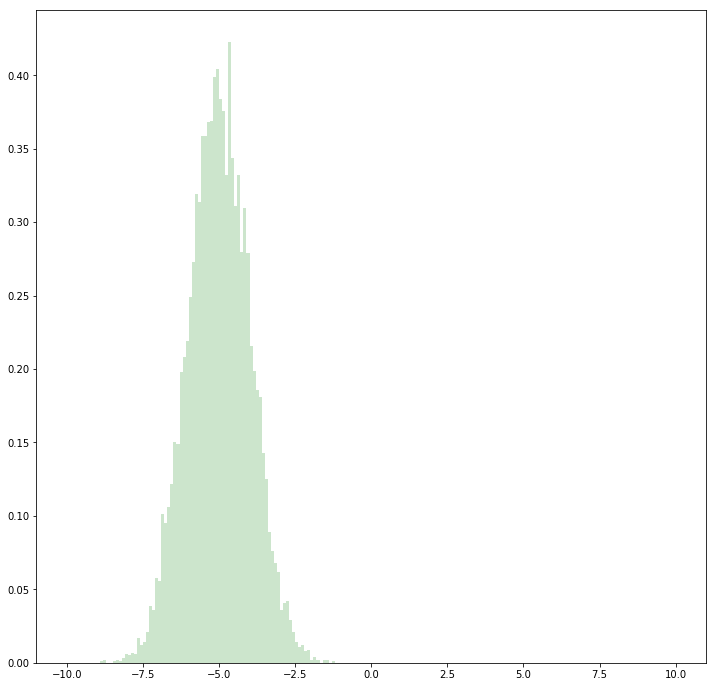

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,12))

g = [np.random.normal(-5, 1) for x in range(10000)]
plt.hist(g, 200, range=(-10,10), normed=True, facecolor='green', alpha=0.2, histtype='stepfilled')
plt.show()

Next, let's plot these points transformed by a linear equation of the form `ax + b`.

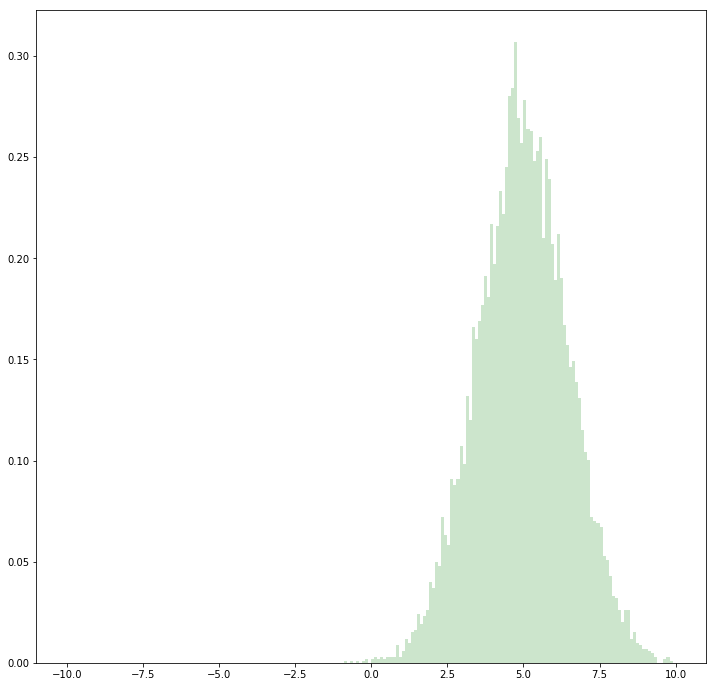

In [2]:
plt.figure(figsize=(12,12))

g = [np.random.normal(-5, 1) for x in range(10000)]
g = [1.5 * x + 12.5 for x in g]
plt.hist(g, 200, range=(-10,10), normed=True, facecolor='green', alpha=0.2, histtype='stepfilled')
plt.show()

As you can see, the distribution remains with a Gaussian appearence.  The height of the mean is lower because the scaling broadened it, and translation moved the mean.  It is, however, of the general shape that we would expect of a Gaussian with the new mean and standard deviation. Now we will try a nonlinear mapping. Since it is fairly common in performing measurements fusing Cartesian and radial coordinates, we will look at a sinusoidal mapping.  `atan` could show up, for example, in computing the yaw from Cartesian coordinates.

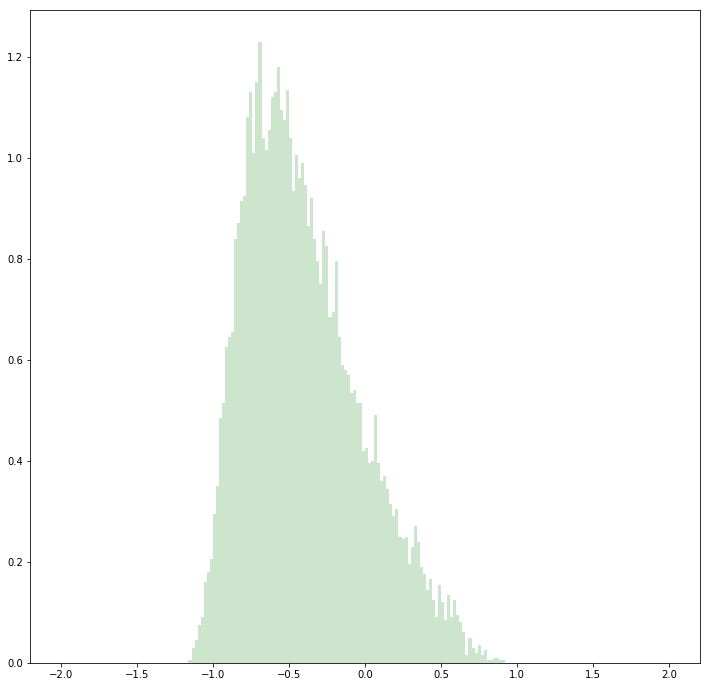

In [3]:
plt.figure(figsize=(12,12))

g = [np.random.normal(-0.5, 0.5) for x in range(10000)]
g = [math.atan(x) for x in g]
plt.hist(g, 200, range=(-2,2), normed=True, facecolor='green', alpha=0.2, histtype='stepfilled')
plt.show()

This is clearly not Gaussian.  The distributions is quite skewed due to the nonlinear nature of `atan`.  If we want to `linearize` the distribution, what we would do is compute the partial derivative of the function (`atan` in our case) evaluated at the mean of the incoming distribution (-0.5 in our case).  Since the derivative of `atan` is ` 1 / 1 + x^2`, when we are evaluating it at the mean (-0.5), we simply end up with a linear mapping in `x` with the scaling constant `1 / 1 + (-0.5)^2`, or `0.8`

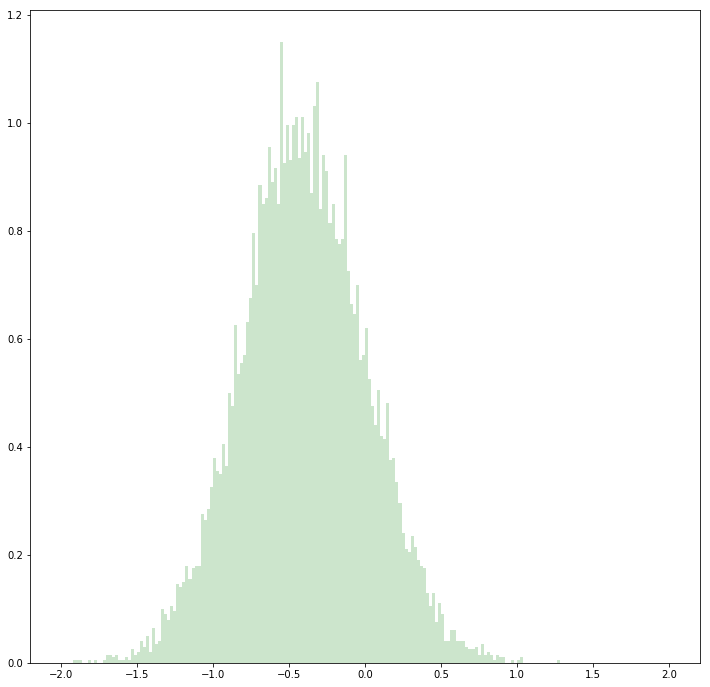

In [4]:
plt.figure(figsize=(12,12))

g = [np.random.normal(-0.5, 0.5) for x in range(10000)]
g = [0.8 * x for x in g]
plt.hist(g, 200, range=(-2,2), normed=True, facecolor='green', alpha=0.2, histtype='stepfilled')
plt.show()

That looks better!  This would generalize to computing a Jacobian to be consistent with our matrix evaluation. 